In [20]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("customer_churn.csv")

print("First 5 rows:\n", df.head())
print("\nInfo:\n", df.info())

# ✅ Don't drop 'customerID' (it doesn't exist in your dataset)

# Convert target column "Churn" to binary
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Encode categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:", categorical_cols)

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nAfter Encoding:\n", df.head())

# Split data
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


First 5 rows:
    tenure  MonthlyCharges        Contract              PaymentMethod Churn
0      52      105.569647        One year    Credit card (automatic)    No
1      15      103.021986        One year  Bank transfer (automatic)    No
2      61       59.718353        Two year  Bank transfer (automatic)    No
3      21       86.808514  Month-to-month    Credit card (automatic)    No
4      24       40.498430        One year               Mailed check    No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          1000 non-null   int64  
 1   MonthlyCharges  1000 non-null   float64
 2   Contract        1000 non-null   object 
 3   PaymentMethod   1000 non-null   object 
 4   Churn           1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB

Info:
 None

Categorical Columns: Index(['Contract'

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("customer_churn.csv")

# 1️⃣ Handle missing values
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())
for col in ['Contract', 'PaymentMethod']:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2️⃣ Encode categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   tenure  MonthlyCharges  Contract  PaymentMethod  Churn
0      52      105.569647         1              1      0
1      15      103.021986         1              0      0
2      61       59.718353         2              0      0
3      21       86.808514         0              1      0
4      24       40.498430         1              3      0


Logistic Regression Accuracy: 0.755
Random Forest Accuracy: 0.725


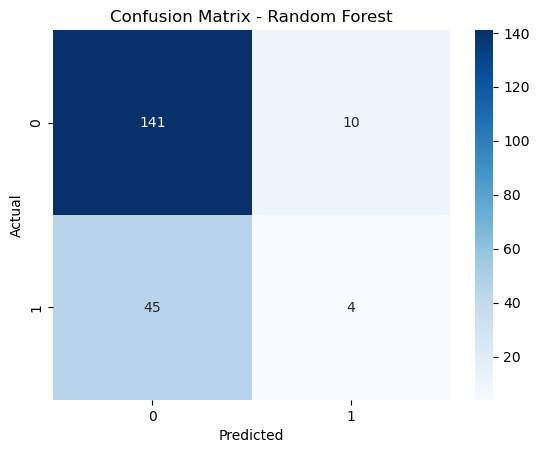

Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       151
           1       0.29      0.08      0.13        49

    accuracy                           0.72       200
   macro avg       0.52      0.51      0.48       200
weighted avg       0.64      0.72      0.66       200



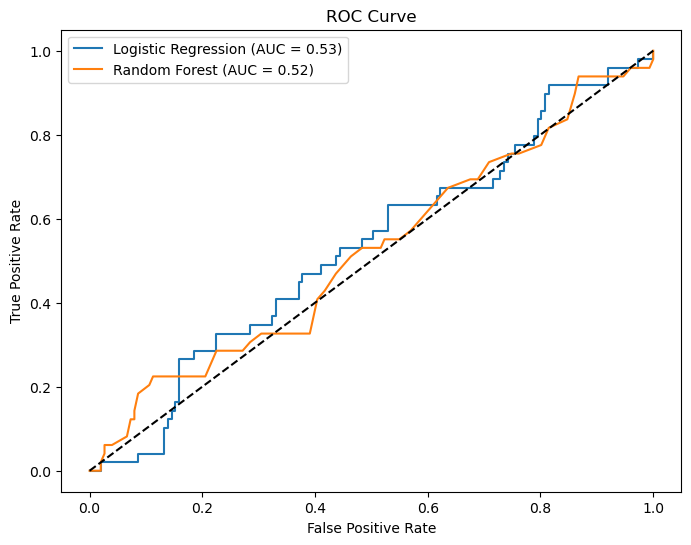

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification Report
print("Classification Report - Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Example new customers
# Columns must match the training dataset order: ['tenure', 'MonthlyCharges', 'Contract', 'PaymentMethod', ...]
new_customers = pd.DataFrame([
    [12, 70.0, 0, 2],  # Customer 1
    [36, 50.0, 1, 0],  # Customer 2
    [5, 90.0, 0, 3]    # Customer 3
], columns=X.columns)  # Make sure columns match the training features

# Scale new customer data
new_customers_scaled = scaler.transform(new_customers)

# Predict churn using Random Forest
predictions = rf_model.predict(new_customers_scaled)
prediction_probs = rf_model.predict_proba(new_customers_scaled)[:,1]

# Display results
for i, (pred, prob) in enumerate(zip(predictions, prediction_probs), 1):
    print(f"Customer {i}: {'Churn' if pred==1 else 'Not Churn'} (Probability: {prob:.2f})")


Customer 1: Not Churn (Probability: 0.13)
Customer 2: Not Churn (Probability: 0.08)
Customer 3: Not Churn (Probability: 0.24)
